In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split 
df = pd.read_csv("weatherAUS_clean.csv")
y = df["RainTomorrow"] # y merupakan label
X = df.drop("RainTomorrow", axis=1) # X merupakan feature-feature data (tidak termasuk label)

# Memisah dataset menjadi 60% data train dan 40% data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [22]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall':make_scorer(recall_score),
           'ROC AUC':make_scorer(roc_auc_score)}

model_1 = XGBClassifier(learning_rate=1.0, max_depth=4, min_child_weight=17, n_estimators=100, n_jobs=1, subsample=0.8500000000000001, verbosity=0)
model_2 = GradientBoostingClassifier(learning_rate=0.1, max_depth=8, max_features=0.1, min_samples_leaf=5, min_samples_split=19, n_estimators=100, subsample=0.45)

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)

y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)

In [23]:
# XGBoost
print(accuracy_score(y_test, y_pred_1))
print(precision_score(y_test, y_pred_1))
print(recall_score(y_test, y_pred_1)) 
print(roc_auc_score(y_test, y_pred_1)) 

0.8988005997001499
0.918141592920354
0.8747365251430292
0.8987000033896693


In [25]:
# Gradient Search
print(accuracy_score(y_test, y_pred_2))
print(precision_score(y_test, y_pred_2))
print(recall_score(y_test, y_pred_2)) 
print(roc_auc_score(y_test, y_pred_2)) 

0.9093703148425787
0.9462789551503203
0.8672086720867209
0.9091940643204581


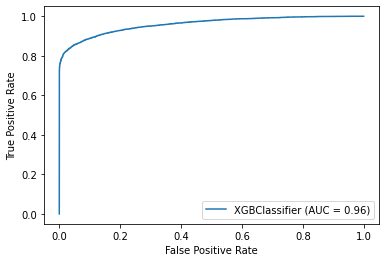

In [26]:
# XGBoost
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt  
plot_roc_curve(model_1, X_test, y_test)  
plt.show()

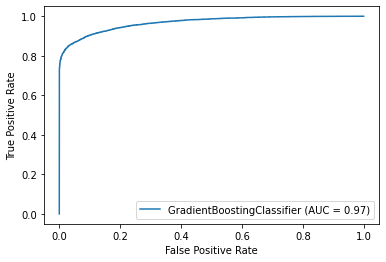

In [27]:
# Gradient Search
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt  
plot_roc_curve(model_2, X_test, y_test)  
plt.show()